# Computer Vision Project: Fruit Recognition using Convolutional Neural Network
## by Sean Fabrega and Isabel Silverman
### AIT-Budapast Deep Learning
### Final Project Milestone 


# Methods for Data Processing and Model Creation

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
from tensorflow.keras.initializers import GlorotNormal, HeNormal # https://www.tensorflow.org/api_docs/python/tf/keras/initializers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D

In [ ]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def data_processing(train_dir, valid_dir, test_dir, input_shape,in_batch_size):
  input_shape = keras.Input(shape=input_shape)

  train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, rotation_range=90)
  train_it = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=in_batch_size
  )

  # load and iterate validation dataset
  valid_it = train_datagen.flow_from_directory(
      valid_dir,
      target_size=(150,150),
      color_mode='rgb',
      class_mode='categorical',
      batch_size=in_batch_size
  )

  test_it = train_datagen.flow_from_directory(
      test_dir,
      target_size=(150,150),
      color_mode='rgb',
      class_mode='categorical',
      batch_size=in_batch_size,
      shuffle=False
  )
  return train_it, test_it, valid_it

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
def create_model1(num_classes, num_train, num_val, batch_size, train_it, valid_it, num_epochs):
  base_model = InceptionV3(weights='imagenet', include_top=False)
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  predictions = Dense(num_classes, activation='softmax')(x)
  model = Model(inputs=base_model.input, outputs=predictions)

  for layer in base_model.layers:
    layer.trainable = False

  model.compile(optimizer='adam', metrics=['accuracy'],
              loss='categorical_crossentropy')
  model.summary()

  es = EarlyStopping(patience=2, restore_best_weights=True, monitor='val_accuracy')
  model.fit(train_it,
            steps_per_epoch=num_train/batch_size, # 2000 / batch_size
            validation_data=valid_it,
            validation_steps=num_val/batch_size, # 500*2 / bitch_size
            epochs=num_epochs,
            callbacks = [es])
  return model

In [ ]:
from tensorflow.keras.applications import DenseNet201
def create_model2(num_classes, num_train, num_val, batch_size, train_it, valid_it, num_epochs):
  base_model = DenseNet201(weights='imagenet', include_top=False)
  x = base_model.output
  x = GlobalAveragePooling2D()(x)

  predictions = Dense(num_classes, activation='softmax')(x)
  model = Model(inputs=base_model.input, outputs=predictions)

  for layer in base_model.layers:
    layer.trainable = False

  model.compile(optimizer='adam', metrics=['accuracy'],
              loss='categorical_crossentropy')
  model.summary()

  es = EarlyStopping(patience=2, restore_best_weights=True, monitor='val_accuracy')
  model.fit(train_it,
            steps_per_epoch=num_train/batch_size, # 2000 / batch_size
            validation_data=valid_it,
            validation_steps=num_val/batch_size, # 500*2 / bitch_size
            epochs=num_epochs,
            callbacks = [es])
  return model

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def show_confusion_matrix(y_test, pred):
  cf_matrix = confusion_matrix(y_test, pred, normalize='true')
  plt.figure(figsize = (10,7))
  sns.heatmap(cf_matrix, annot=False, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=False)
  plt.title('Normalized Confusion Matrix', fontsize = 23)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.show()

def evaluate_model(test_it, train_it, model):
  pred = model.predict(test_it)
  pred = np.argmax(pred,axis=1)

  labels = (train_it.class_indices)
  labels = dict((v,k) for k,v in labels.items())
  pred = [labels[k] for k in pred]

  y_test = test_it.classes
  y_test = [labels[k] for k in y_test]

  acc = accuracy_score(y_test,pred)
  print("Accuracy:")
  print(round(acc,4))

  show_confusion_matrix(y_test, pred)


## 1. Downloading and Pre-processing the Data


---



---



II. Install Kaggle package if not already installed

In [ ]:
!pip install kaggle --upgrade

II. Import Kaggle and Authenticate

In [ ]:
#before continuing please download your kaggle key and import the kaggle.json file
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import kaggle
kaggle.api.authenticate()

#III. Install Datasets
## A. Fruit-Recognition

In [ ]:
!kaggle datasets download -d chrisfilo/fruit-recognition
!apt install unp
!unp fruit-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: Pomegranate/Pomegranet00322.png  
  inflating: Pomegranate/Pomegranet00323.png  
  inflating: Pomegranate/Pomegranet00324.png  
  inflating: Pomegranate/Pomegranet00325.png  
  inflating: Pomegranate/Pomegranet00326.png  
  inflating: Pomegranate/Pomegranet00327.png  
  inflating: Pomegranate/Pomegranet00328.png  
  inflating: Pomegranate/Pomegranet00329.png  
  inflating: Pomegranate/Pomegranet0033.png  
  inflating: Pomegranate/Pomegranet00330.png  
  inflating: Pomegranate/Pomegranet00331.png  
  inflating: Pomegranate/Pomegranet00332.png  
  inflating: Pomegranate/Pomegranet00333.png  
  inflating: Pomegranate/Pomegranet00334.png  
  inflating: Pomegranate/Pomegranet00335.png  
  inflating: Pomegranate/Pomegranet00336.png  
  inflating: Pomegranate/Pomegranet00337.png  
  inflating: Pomegranate/Pomegranet00338.png  
  inflating: Pomegranate/Pomegranet00339.png  
  inflating: Pomegranate/Pomegranet0034.png  
  inflating

In [ ]:
!mkdir /content/data
!mkdir /content/data/fruit-rec
!mv /content/Apple /content/data/fruit-rec
!mv /content/Banana /content/data/fruit-rec
!mv /content/Carambola /content/data/fruit-rec
!mv /content/Guava /content/data/fruit-rec
!mv /content/Kiwi /content/data/fruit-rec
!mv /content/Mango /content/data/fruit-rec
!mv /content/Orange /content/data/fruit-rec
!mv /content/Peach /content/data/fruit-rec
!mv /content/Pear /content/data/fruit-rec
!mv /content/Persimmon /content/data/fruit-rec
!mv /content/Pitaya /content/data/fruit-rec
!mv /content/Plum /content/data/fruit-rec
!mv /content/Pomegranate /content/data/fruit-rec
!mv /content/Tomatoes /content/data/fruit-rec
!mv /content/muskmelon /content/data/fruit-rec

## B. Fruits-360

In [ ]:
!kaggle datasets download -d moltean/fruits/fruits-360_dataset/fruits-360/
!apt install unp
!unp fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [ ]:
#!mkdir /content/data
!mkdir /content/data/fruits
!mv /content/fruits-360_dataset/fruits-360 /content/data/fruits/

In [ ]:
!mkdir /content/data/selected-fruits

## organizing fruit-360 data

In [ ]:
!mkdir /content/data/selected-fruits/apple
!mv -v /content/data/fruits/fruits-360/Training/"Apple Red 1"/* /content/data/selected-fruits/apple
!mv -v /content/data/fruits/fruits-360/Training/"Apple Red 2"/* /content/data/selected-fruits/apple
!mv -v /content/data/fruits/fruits-360/Training/"Apple Red 3"/* /content/data/selected-fruits/apple
!mv -v /content/data/fruits/fruits-360/Training/"Apple Golden 1"/* /content/data/selected-fruits/apple
!mv -v /content/data/fruits/fruits-360/Training/"Apple Golden 2"/* /content/data/selected-fruits/apple
!mv -v /content/data/fruits/fruits-360/Training/"Apple Golden 3"/* /content/data/selected-fruits/apple
!mv -v /content/data/fruits/fruits-360/Training/"Apple Granny Smith"/* /content/data/selected-fruits/apple
!mv -v /content/data/fruits/fruits-360/Training/"Apple Pink Lady"/* /content/data/selected-fruits/apple

!mv -v /content/data/fruits/fruits-360/Test/"Apple Red 1"/* /content/data/selected-fruits/apple
!mv -v /content/data/fruits/fruits-360/Test/"Apple Red 2"/* /content/data/selected-fruits/apple
!mv -v /content/data/fruits/fruits-360/Test/"Apple Red 3"/* /content/data/selected-fruits/apple
!mv -v /content/data/fruits/fruits-360/Test/"Apple Golden 1"/* /content/data/selected-fruits/apple
!mv -v /content/data/fruits/fruits-360/Test/"Apple Golden 2"/* /content/data/selected-fruits/apple
!mv -v /content/data/fruits/fruits-360/Test/"Apple Golden 3"/* /content/data/selected-fruits/apple
!mv -v /content/data/fruits/fruits-360/Test/"Apple Granny Smith"/* /content/data/selected-fruits/apple
!mv -v /content/data/fruits/fruits-360/Test/"Apple Pink Lady"/* /content/data/selected-fruits/apple

!mkdir /content/data/selected-fruits/apricot
!mv -v /content/data/fruits/fruits-360/Training/Apricot/* /content/data/selected-fruits/apricot
!mv -v /content/data/fruits/fruits-360/Test/Apricot/* /content/data/selected-fruits/apricot

!mkdir /content/data/selected-fruits/avocado
!mv -v /content/data/fruits/fruits-360/Training/Avocado/* /content/data/selected-fruits/avocado
!mv -v /content/data/fruits/fruits-360/Training/"Avocado ripe"/* /content/data/selected-fruits/avocado
!mv -v /content/data/fruits/fruits-360/Test/Avocado/* /content/data/selected-fruits/avocado
!mv -v /content/data/fruits/fruits-360/Test/"Avocado ripe"/* /content/data/selected-fruits/avocado

!mkdir /content/data/selected-fruits/banana
!mv -v /content/data/fruits/fruits-360/Training/Banana/* /content/data/selected-fruits/banana
!mv -v /content/data/fruits/fruits-360/Training/"Banana Lady Finger"/* /content/data/selected-fruits/banana
!mv -v /content/data/fruits/fruits-360/Test/Banana/* /content/data/selected-fruits/banana
!mv -v /content/data/fruits/fruits-360/Test/"Banana Lady Finger"/* /content/data/selected-fruits/banana

!mkdir /content/data/selected-fruits/blueberry
!mv -v /content/data/fruits/fruits-360/Training/Blueberry/* /content/data/selected-fruits/blueberry
!mv -v /content/data/fruits/fruits-360/Test/Blueberry/* /content/data/selected-fruits/blueberry

!mkdir /content/data/selected-fruits/cantaloupe
!mv -v /content/data/fruits/fruits-360/Training/"Cantaloupe 1"/* /content/data/selected-fruits/cantaloupe
!mv -v /content/data/fruits/fruits-360/Test/"Cantaloupe 1"/* /content/data/selected-fruits/cantaloupe
!mv -v /content/data/fruits/fruits-360/Training/"Cantaloupe 2"/* /content/data/selected-fruits/cantaloupe
!mv -v /content/data/fruits/fruits-360/Test/"Cantaloupe 2"/* /content/data/selected-fruits/cantaloupe

!mkdir /content/data/selected-fruits/cherry
!mv -v /content/data/fruits/fruits-360/Training/"Cherry 1"/* /content/data/selected-fruits/cherry
!mv -v /content/data/fruits/fruits-360/Test/"Cherry 1"/* /content/data/selected-fruits/cherry
!mv -v /content/data/fruits/fruits-360/Training/"Cherry 2"/* /content/data/selected-fruits/cherry
!mv -v /content/data/fruits/fruits-360/Test/"Cherry 2"/* /content/data/selected-fruits/cherry
!mv -v /content/data/fruits/fruits-360/Training/"Cherry Rainier"/* /content/data/selected-fruits/cherry
!mv -v /content/data/fruits/fruits-360/Test/"Cherry Rainier"/* /content/data/selected-fruits/cherry

!mkdir /content/data/selected-fruits/clementine
!mv -v /content/data/fruits/fruits-360/Training/Clementine/* /content/data/selected-fruits/clementine
!mv -v /content/data/fruits/fruits-360/Test/Clementine/* /content/data/selected-fruits/clementine

!mkdir /content/data/selected-fruits/cocos
!mv -v /content/data/fruits/fruits-360/Training/Cocos/* /content/data/selected-fruits/cocos
!mv -v /content/data/fruits/fruits-360/Test/Cocos/* /content/data/selected-fruits/cocos

!mkdir /content/data/selected-fruits/dates
!mv -v /content/data/fruits/fruits-360/Training/Dates/* /content/data/selected-fruits/dates
!mv -v /content/data/fruits/fruits-360/Test/Dates/* /content/data/selected-fruits/dates
!mkdir /content/data/selected-fruits/fig
!mv -v /content/data/fruits/fruits-360/Training/Fig/* /content/data/selected-fruits/fig
!mv -v /content/data/fruits/fruits-360/Test/Fig/* /content/data/selected-fruits/fig
!mkdir /content/data/selected-fruits/grape
!mv -v /content/data/fruits/fruits-360/Training/"Grape Blue"/* /content/data/selected-fruits/grape
!mv -v /content/data/fruits/fruits-360/Test/"Grape Blue"/* /content/data/selected-fruits/grape
!mv -v /content/data/fruits/fruits-360/Training/"Grape Pink"/* /content/data/selected-fruits/grape
!mv -v /content/data/fruits/fruits-360/Test/"Grape Pink"/* /content/data/selected-fruits/grape
!mv -v /content/data/fruits/fruits-360/Training/"Grape White"/* /content/data/selected-fruits/grape
!mv -v /content/data/fruits/fruits-360/Test/"Grape White"/* /content/data/selected-fruits/grape
!mkdir /content/data/selected-fruits/grapefruit
!mv -v /content/data/fruits/fruits-360/Training/"Grapefruit Pink"/* /content/data/selected-fruits/grapefruit
!mv -v /content/data/fruits/fruits-360/Test/"Grapefruit Pink"/* /content/data/selected-fruits/grapefruit
!mv -v /content/data/fruits/fruits-360/Training/"Grapefruit White"/* /content/data/selected-fruits/grapefruit
!mv -v /content/data/fruits/fruits-360/Test/"Grapefruit White"/* /content/data/selected-fruits/grapefruit
!mkdir /content/data/selected-fruits/guava
!mv -v /content/data/fruits/fruits-360/Training/Guava/* /content/data/selected-fruits/guava
!mv -v /content/data/fruits/fruits-360/Test/Guava/* /content/data/selected-fruits/guava
!mkdir /content/data/selected-fruits/kiwi
!mv -v /content/data/fruits/fruits-360/Training/Kiwi/* /content/data/selected-fruits/kiwi
!mv -v /content/data/fruits/fruits-360/Test/Kiwi/* /content/data/selected-fruits/kiwi
!mkdir /content/data/selected-fruits/kumquats
!mv -v /content/data/fruits/fruits-360/Training/Kumquats/* /content/data/selected-fruits/kumquats
!mv -v /content/data/fruits/fruits-360/Test/Kumquats/* /content/data/selected-fruits/kumquats
!mkdir /content/data/selected-fruits/lemon
!mv -v /content/data/fruits/fruits-360/Training/Lemon/* /content/data/selected-fruits/lemon
!mv -v /content/data/fruits/fruits-360/Test/Lemon/* /content/data/selected-fruits/lemon
!mv -v /content/data/fruits/fruits-360/Training/"Lemon Meyer"/* /content/data/selected-fruits/lemon
!mv -v /content/data/fruits/fruits-360/Test/"Lemon Meyer"/* /content/data/selected-fruits/lemon
!mkdir /content/data/selected-fruits/limes
!mv -v /content/data/fruits/fruits-360/Training/Limes/* /content/data/selected-fruits/limes
!mv -v /content/data/fruits/fruits-360/Test/Limes/* /content/data/selected-fruits/limes
!mkdir /content/data/selected-fruits/lychee
!mv -v /content/data/fruits/fruits-360/Training/Lychee/* /content/data/selected-fruits/lychee
!mv -v /content/data/fruits/fruits-360/Test/Lychee/* /content/data/selected-fruits/lychee
!mkdir /content/data/selected-fruits/mandarine
!mv -v /content/data/fruits/fruits-360/Training/Mandarine/* /content/data/selected-fruits/mandarine
!mv -v /content/data/fruits/fruits-360/Test/Mandarine/* /content/data/selected-fruits/mandarine
!mkdir /content/data/selected-fruits/mango
!mv -v /content/data/fruits/fruits-360/Training/Mango/* /content/data/selected-fruits/mango
!mv -v /content/data/fruits/fruits-360/Test/Mango/* /content/data/selected-fruits/mango
!mv -v /content/data/fruits/fruits-360/Training/"Mango Red"/* /content/data/selected-fruits/mango
!mv -v /content/data/fruits/fruits-360/Test/"Mango Red"/* /content/data/selected-fruits/mango
!mkdir /content/data/selected-fruits/mangostan
!mv -v /content/data/fruits/fruits-360/Training/Mangostan/* /content/data/selected-fruits/mangostan
!mv -v /content/data/fruits/fruits-360/Test/Mangostan/* /content/data/selected-fruits/mangostan
!mkdir /content/data/selected-fruits/nectarine
!mv -v /content/data/fruits/fruits-360/Training/Nectarine/* /content/data/selected-fruits/nectarine
!mv -v /content/data/fruits/fruits-360/Test/Nectarine/* /content/data/selected-fruits/nectarine
!mv -v /content/data/fruits/fruits-360/Training/"Nectarine Flat"/* /content/data/selected-fruits/nectarine
!mv -v /content/data/fruits/fruits-360/Test/"Nectarine Flat"/* /content/data/selected-fruits/nectarine
!mkdir /content/data/selected-fruits/orange
!mv -v /content/data/fruits/fruits-360/Training/Orange/* /content/data/selected-fruits/orange
!mv -v /content/data/fruits/fruits-360/Test/Orange/* /content/data/selected-fruits/orange
!mkdir /content/data/selected-fruits/papaya
!mv -v /content/data/fruits/fruits-360/Training/Papaya/* /content/data/selected-fruits/papaya
!mv -v /content/data/fruits/fruits-360/Test/Papaya/* /content/data/selected-fruits/papaya
!mkdir /content/data/selected-fruits/passionfruit
!mv -v /content/data/fruits/fruits-360/Training/"Passion Fruit"/* /content/data/selected-fruits/passionfruit
!mv -v /content/data/fruits/fruits-360/Test/"Passion Fruit"/* /content/data/selected-fruits/passionfruit
!mkdir /content/data/selected-fruits/peach
!mv -v /content/data/fruits/fruits-360/Training/Peach/* /content/data/selected-fruits/peach
!mv -v /content/data/fruits/fruits-360/Test/Peach/* /content/data/selected-fruits/peach
!mv -v /content/data/fruits/fruits-360/Training/"Peach 2"/* /content/data/selected-fruits/peach
!mv -v /content/data/fruits/fruits-360/Test/"Peach 2"/* /content/data/selected-fruits/peach
!mv -v /content/data/fruits/fruits-360/Training/"Peach Flat"/* /content/data/selected-fruits/peach
!mv -v /content/data/fruits/fruits-360/Test/"Peach Flat"/* /content/data/selected-fruits/peach
!mkdir /content/data/selected-fruits/pear
!mv -v /content/data/fruits/fruits-360/Training/Pear/* /content/data/selected-fruits/pear
!mv -v /content/data/fruits/fruits-360/Test/Pear/* /content/data/selected-fruits/pear
!mv -v /content/data/fruits/fruits-360/Training/"Pear 2"/* /content/data/selected-fruits/pear
!mv -v /content/data/fruits/fruits-360/Test/"Pear 2"/* /content/data/selected-fruits/pear
!mkdir /content/data/selected-fruits/pineapple
!mv -v /content/data/fruits/fruits-360/Training/Pineapple/* /content/data/selected-fruits/pineapple
!mv -v /content/data/fruits/fruits-360/Test/Pineapple/* /content/data/selected-fruits/pineapple
!mkdir /content/data/selected-fruits/plum
!mv -v /content/data/fruits/fruits-360/Training/Plum/* /content/data/selected-fruits/plum
!mv -v /content/data/fruits/fruits-360/Test/Plum/* /content/data/selected-fruits/plum
!mv -v /content/data/fruits/fruits-360/Training/"Plum 2"/* /content/data/selected-fruits/plum
!mv -v /content/data/fruits/fruits-360/Test/"Plum 2"/* /content/data/selected-fruits/plum
!mv -v /content/data/fruits/fruits-360/Training/"Plum 3"/* /content/data/selected-fruits/plum
!mv -v /content/data/fruits/fruits-360/Test/"Plum 3"/* /content/data/selected-fruits/plum
!mkdir /content/data/selected-fruits/pomegranate
!mv -v /content/data/fruits/fruits-360/Training/Pomegranate/* /content/data/selected-fruits/pomegranate
!mv -v /content/data/fruits/fruits-360/Test/Pomegranate/* /content/data/selected-fruits/pomegranate
!mkdir /content/data/selected-fruits/raspberry
!mv -v /content/data/fruits/fruits-360/Training/Raspberry/* /content/data/selected-fruits/raspberry
!mv -v /content/data/fruits/fruits-360/Test/Raspberry/* /content/data/selected-fruits/raspberry
!mkdir /content/data/selected-fruits/strawberry
!mv -v /content/data/fruits/fruits-360/Training/Strawberry/* /content/data/selected-fruits/strawberry
!mv -v /content/data/fruits/fruits-360/Test/Strawberry/* /content/data/selected-fruits/strawberry
!mv -v /content/data/fruits/fruits-360/Training/"Strawberry Wedge"/* /content/data/selected-fruits/strawberry
!mv -v /content/data/fruits/fruits-360/Test/"Strawberry Wedge"/* /content/data/selected-fruits/strawberry
!mkdir /content/data/selected-fruits/watermelon
!mv -v /content/data/fruits/fruits-360/Training/Watermelon/* /content/data/selected-fruits/watermelon
!mv -v /content/data/fruits/fruits-360/Test/Watermelon/* /content/data/selected-fruits/watermelon

Streaming output truncated to the last 5000 lines.
renamed '/content/data/fruits/fruits-360/Training/Plum 2/r_259_100.jpg' -> '/content/data/selected-fruits/plum/r_259_100.jpg'
renamed '/content/data/fruits/fruits-360/Training/Plum 2/r_260_100.jpg' -> '/content/data/selected-fruits/plum/r_260_100.jpg'
renamed '/content/data/fruits/fruits-360/Training/Plum 2/r_26_100.jpg' -> '/content/data/selected-fruits/plum/r_26_100.jpg'
renamed '/content/data/fruits/fruits-360/Training/Plum 2/r_261_100.jpg' -> '/content/data/selected-fruits/plum/r_261_100.jpg'
renamed '/content/data/fruits/fruits-360/Training/Plum 2/r_262_100.jpg' -> '/content/data/selected-fruits/plum/r_262_100.jpg'
renamed '/content/data/fruits/fruits-360/Training/Plum 2/r_263_100.jpg' -> '/content/data/selected-fruits/plum/r_263_100.jpg'
renamed '/content/data/fruits/fruits-360/Training/Plum 2/r_264_100.jpg' -> '/content/data/selected-fruits/plum/r_264_100.jpg'
renamed '/content/data/fruits/fruits-360/Training/Plum 2/r_265_100.jp

# IV. Showing Images

## A. Fruit-Recognition

(258, 320, 3)


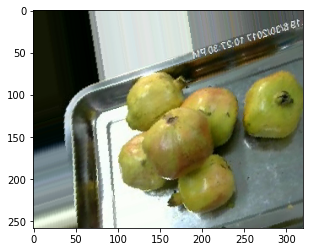

In [ ]:
show_image("/content/data/fruit-rec/Pomegranate/Pomegranet00322.png")

## B. Fruits-360

(100, 100, 3)


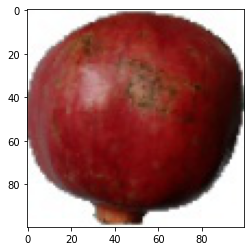

In [ ]:
show_image("/content/data/selected-fruits/pomegranate/0_100.jpg")

# V. More data processing
## A. Fruit-Recognition

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('/content/data/fruit-rec', output="output-fruit-rec", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 31201 files [01:18, 397.00 files/s] 


In [ ]:
train_it_fr, test_it_fr, valid_it_fr = data_processing('output-fruit-rec/train/',
                                                       'output-fruit-rec/val/',
                                                       'output-fruit-rec/test/',
                                                        (258, 320, 3),
                                                        128)

Found 24955 images belonging to 15 classes.
Found 3115 images belonging to 15 classes.
Found 3131 images belonging to 15 classes.


## B. Fruits-360

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('/content/data/selected-fruits', output="output-fruit-360", seed=1337, ratio=(0.8, 0.1,0.1)) 

Copying files: 25157 files [00:21, 1159.96 files/s]


In [ ]:
train_it_fr360, test_it_fr360, valid_it_fr360 = data_processing('output-fruit-360/train/',
                                                                'output-fruit-360/val/',
                                                                'output-fruit-360/test/',#technically test set which we took from the test folder
                                                                (100, 100, 3),
                                                                128)

Found 20103 images belonging to 34 classes.
Found 2497 images belonging to 34 classes.
Found 2557 images belonging to 34 classes.


# VI. Training The Model
## A. Fruit Recognition

In [ ]:
fr_model1 = create_model1(15, 24955, 3115, 1000, train_it_fr, valid_it_fr, 500)

87924736/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                  

In [ ]:
fr_model2 = create_model2(15, 24955, 3115, 1000, train_it_fr, valid_it_fr, 500)

74850304/74836368 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                           

INCEPTION V3 MODEL EVALUATION ON FRUIT REC DATA
Accuracy:
0.893


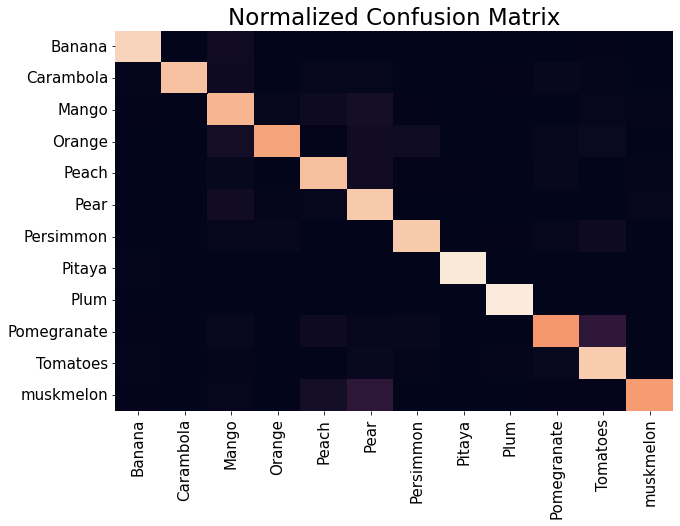

In [ ]:
print("INCEPTION V3 MODEL EVALUATION ON FRUIT REC DATA")
evaluate_model(test_it_fr,train_it_fr,fr_model1)

DENSENET 201 MODEL EVALUATION
Accuracy:
0.9614


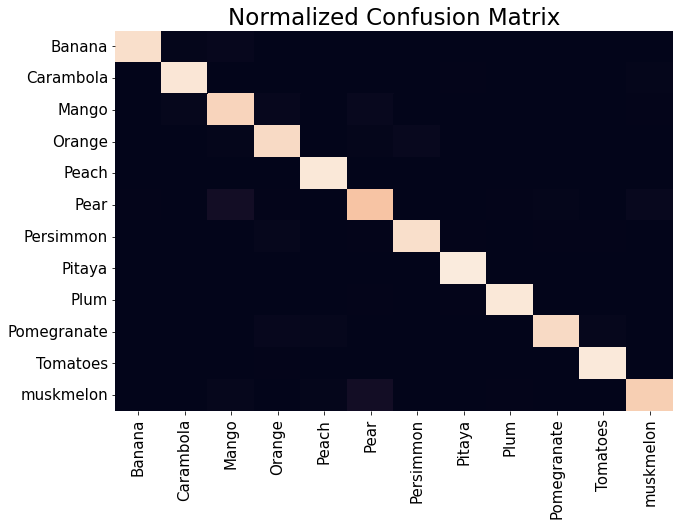

In [ ]:
print("DENSENET 201 MODEL EVALUATION")
evaluate_model(test_it_fr,train_it_fr,fr_model2)

## B. Fruits-360

In [ ]:
fr360_model1 = create_model1(34, 20103, 2497, 1000, train_it_fr360, valid_it_fr360, 500)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_188 (Conv2D)            (None, None, None,   864         ['input_6[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization_188 (Batch  (None, None, None,   96         ['conv2d_188[0][0]']             
 Normalization)                 32)                                                         

In [ ]:
fr360_model2 = create_model2(34, 20103, 2497, 1000, train_it_fr360, valid_it_fr360, 500)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, None, None,   0          ['input_7[0][0]']                
 D)                             3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d_2[0][0]']       
                                64)                                                         

INCEPTION V3 MODEL EVALUATION ON FRUIT 360 DATA
Accuracy:
0.9519


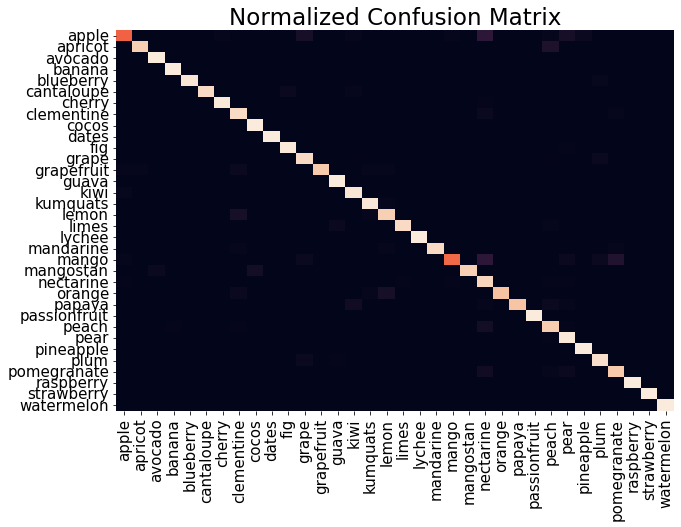

In [ ]:
print("INCEPTION V3 MODEL EVALUATION ON FRUIT 360 DATA")
evaluate_model(test_it_fr360,train_it_fr360,fr360_model1)

DENSENET 201 MODEL EVALUATION ON FRUIT 360 DATA
Accuracy:
0.9683


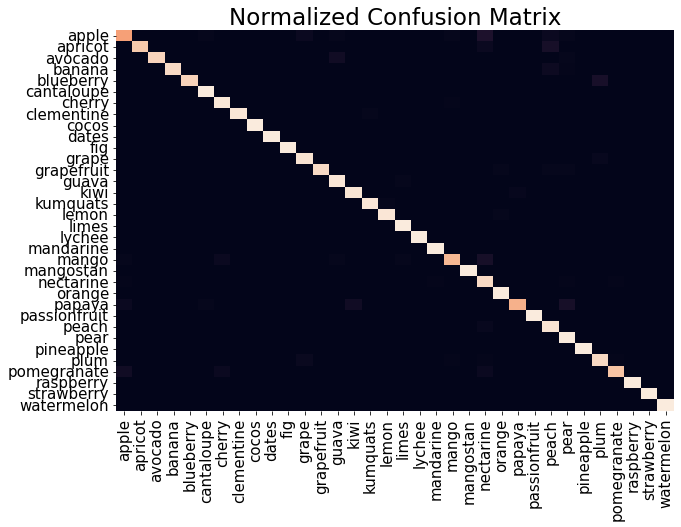

In [ ]:
print("DENSENET 201 MODEL EVALUATION ON FRUIT 360 DATA")
evaluate_model(test_it_fr360,train_it_fr360,fr360_model2)